# Adaptive thresholding


Adaptive thresholding is method instead of use a fixed threshold value in each pixel of image use a different thershold value for each region of image (eacg region has a fixed threshold value). This method enables us to solve the brightness problem.

<img src="images/global_thresh_problem.jpg">

The type of adaptive thresholding are:

- Mean;

- Gaussian.

#### Adaptive thresholding - Mean

The threshold is the mean of the neighborhood area, that is, given the defined block size, the threshold value is:

 adaptive theshold =$ \frac{\sum_{i=1}^{h}{\sum_{j=1}^{w}{x_{ij}}}}{h* w} - c $

#### Adaptive thresholding - Gaussian

The threshold is the weighted mean of the neighborhood area where the weights are the gaussian window.

### Global thresholding technique:

Given the image above, let's first try to solve it with Otsu's method.

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def show_image(image, title, cmap=None):
    if cmap == None:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap=cmap)
    
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [15]:
image = cv2.imread('images/global_thresh_problem.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

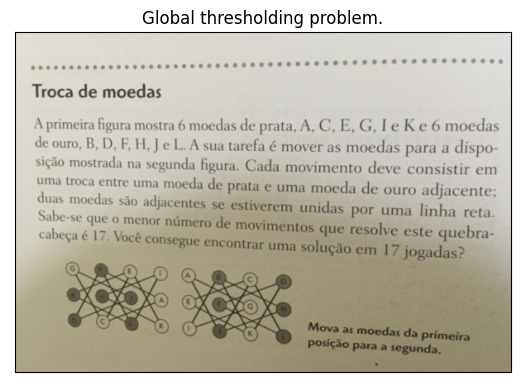

In [16]:
show_image(image, 'Global thresholding problem.')

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

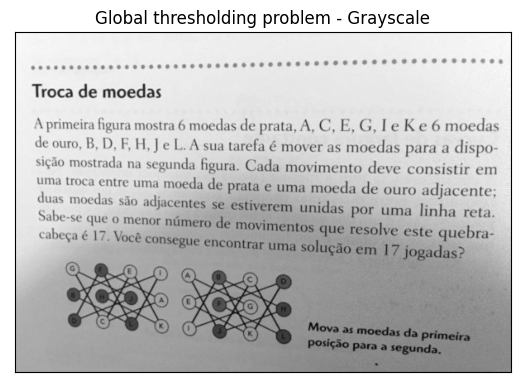

In [18]:
show_image(gray_image, 'Global thresholding problem - Grayscale', cmap='gray')

In [19]:
threshold_value, thresholded_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [20]:
print(f'Thresholded value by Otsu\'s Method: {threshold_value}')

Thresholded value by Otsu's Method: 175.0


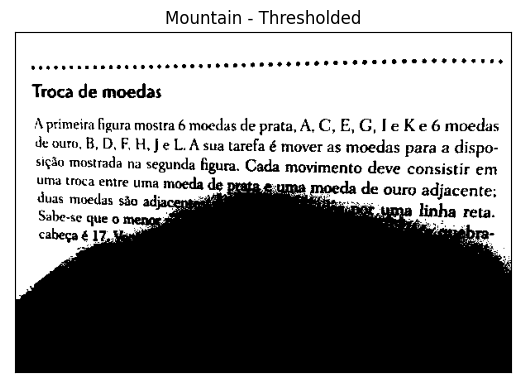

In [21]:
plt.imshow(thresholded_image)
show_image(thresholded_image, 'Mountain - Thresholded', cmap='gray')

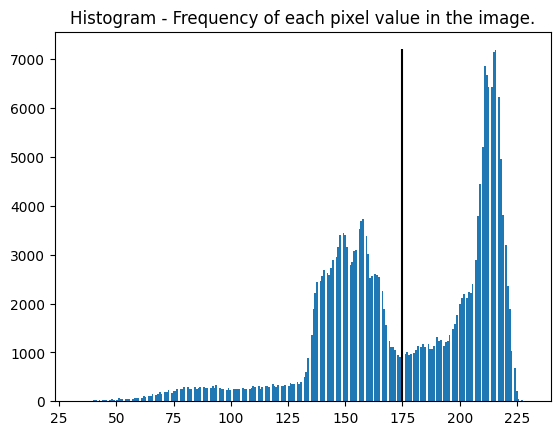

In [22]:
image_flattened = gray_image.flatten()

plt.hist(x=image_flattened, bins=255)
plt.title('Histogram - Frequency of each pixel value in the image.')
plt.vlines(threshold_value, 0, 7200, 'black')
plt.show()

As we can see, we didn't achieve a good result.